In [3]:
# Filtered and cleaned data


import pandas as pd


df = pd.read_excel('Sample_Superstore.xls', sheet_name='Orders')


df = df.loc[:, ~df.columns.duplicated()]
df = df.drop_duplicates()


df = df.dropna(axis=1, how='all')
df = df.dropna(axis=0, how='all')

df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category.2,Product Name.1,Sales.2,Quantity.2,Discount.1,Profit.1,Country.2,Region.2,Sub-Category.3,Quantity.3
0,1.0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bookcases,Bush Somerset Collection Bookcase,261.9600,2.0,0.00,41.9136,United States,South,Bookcases,2.000
1,2.0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0,0.00,219.5820,United States,South,Chairs,3.000
2,3.0,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0,0.00,6.8714,United States,West,Labels,2.000
3,4.0,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,0.45,-383.0310,United States,South,Tables,5.000
4,5.0,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Storage,Eldon Fold 'N Roll Cart System,22.3680,2.0,0.20,2.5164,United States,South,Storage,2.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11415,9980.0,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,...,Binders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,437.472
11416,9981.0,US-2015-151435,2015-09-06,2015-09-09,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,...,Tables,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.980
11417,9982.0,CA-2017-163566,2017-08-03,2017-08-06,First Class,TB-21055,Ted Butterfield,Consumer,United States,Fairfield,...,Labels,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.520
11418,9983.0,US-2016-157728,2016-09-22,2016-09-28,Standard Class,RC-19960,Ryan Crowe,Consumer,United States,Grand Rapids,...,Paper,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.560


Region
Central     38626.7423
East        89298.4390
South       44919.4292
West       107853.3315
Name: Profit, dtype: float64
[ 38626.7423  89298.439   44919.4292 107853.3315]


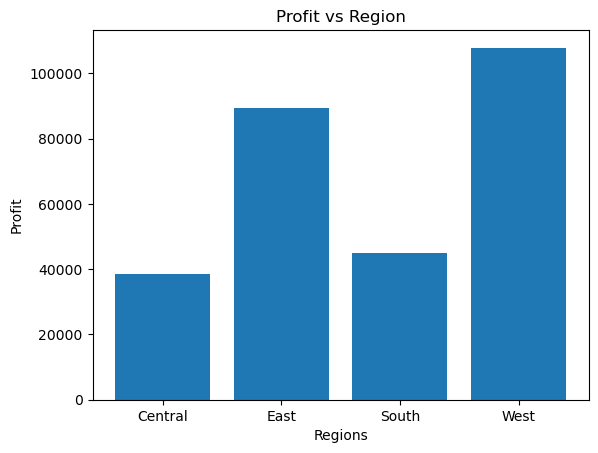

In [10]:
#   Task 1    1.How does the distribution of profit vary across different regions

import matplotlib.pyplot as plt

df['Profit']=pd.to_numeric(df['Profit'],errors='coerce').fillna(0)
RegionProfit = df.groupby("Region")["Profit"].sum()
Region=RegionProfit.index
Reg=RegionProfit.values

print(RegionProfit)
print(Reg)

plt.title('Profit vs Region')
plt.xlabel('Regions')
plt.ylabel('Profit')
plt.bar(Region,Reg)
plt.show()

Sub-Category
Accessories    186828.364
Appliances     121542.633
Art             30483.394
Binders        248292.380
Bookcases      136421.440
Chairs         369256.523
Copiers        161367.832
Envelopes       17656.662
Fasteners        3335.052
Furnishings    101964.424
Labels          13771.666
Machines       192337.720
Paper           87581.192
Phones         371165.134
Storage        250574.694
Supplies        48936.558
Tables         227187.780
Name: Sales, dtype: float64


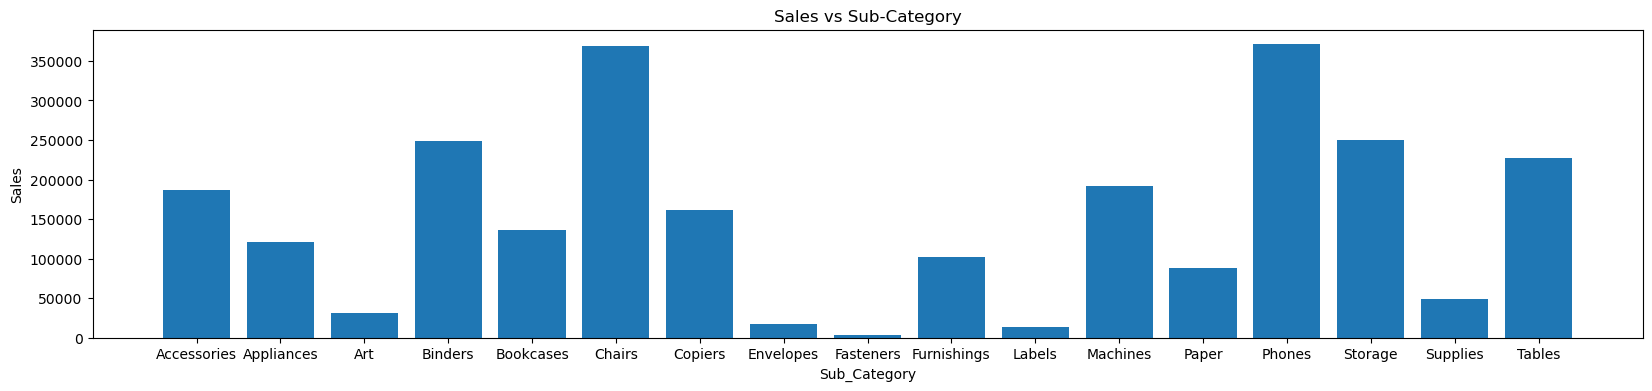

In [23]:
#2.    Can you create a bar chart to compare the sales performance of different sub-categories of products?


import matplotlib.pyplot as plt

df['Sales']=pd.to_numeric(df['Sales'],errors='coerce').fillna(0)
Sales = df.groupby("Sub-Category")["Sales"].sum()
Y=Sales.values
S=Sales.index

print(Sales)

plt.figure(figsize=(20, 4))
plt.title('Sales vs Sub-Category')
plt.xlabel('Sub_Category')
plt.ylabel('Sales')
plt.bar(S,Y)

plt.show()

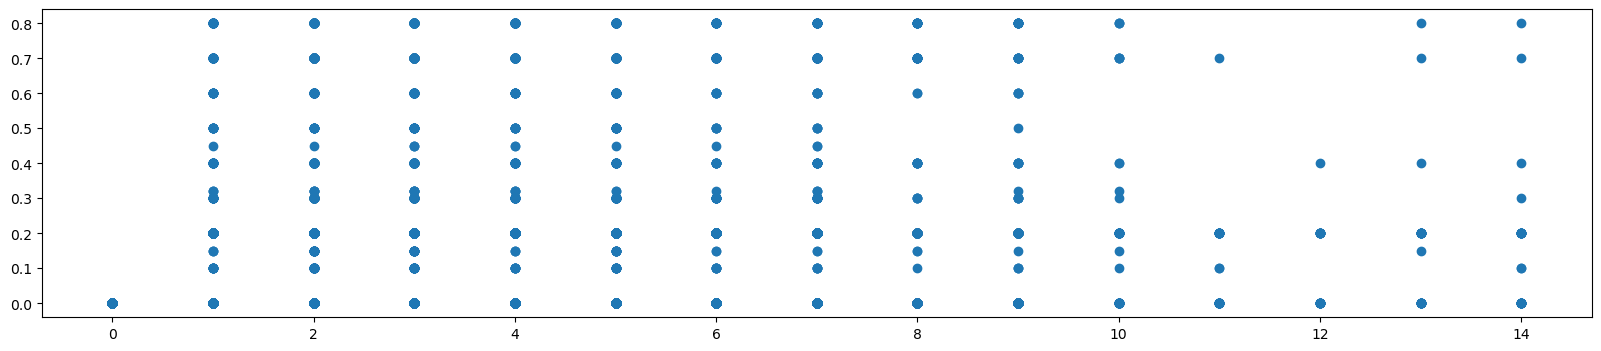

In [28]:
#   3.Is there a correlation between the quantity of products ordered and the discount given? Visualize it using a scatter plot.

df['Quantity']=pd.to_numeric(df['Quantity'],errors='coerce').fillna(0)
df['Discount']=pd.to_numeric(df['Discount'],errors='coerce').fillna(0)

plt.figure(figsize=(20,4))
plt.scatter(df['Quantity'],df['Discount'])


Text(0, 0.5, 'Sales')

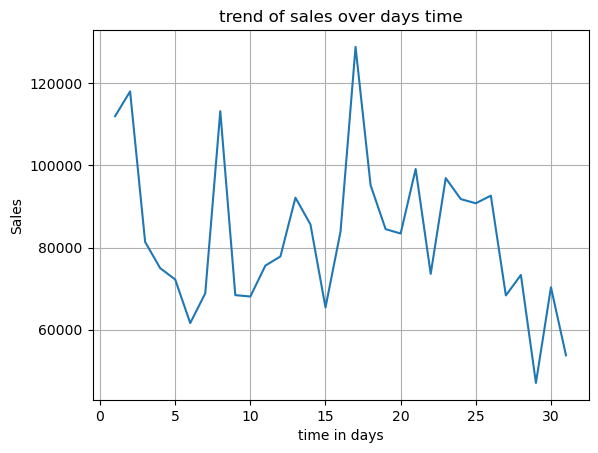

In [38]:
#     4.Create a line chart to show the trend of sales over time.
import pandas as pd

df['Sales']=pd.to_numeric(df['Sales'],errors='coerce').fillna(0)
df['Order Date']=pd.to_datetime(df['Order Date'])
saless=df.groupby(df['Order Date'].dt.day)['Sales'].sum()
s=saless.index
y=saless.values

plt.plot(s,y)
plt.grid(axis='y')
plt.grid(axis='x')
plt.title('trend of sales over days time')
plt.xlabel('time in days')
plt.ylabel('Sales')

([<matplotlib.patches.Wedge at 0x1ebebbb9000>,
 [Text(-0.3236925034255645, 1.051295944644557, 'Standard Class'),
  Text(-0.38935815404346813, -1.0287858027207915, 'Second Class'),
  Text(0.7394010742083033, -0.8144237542333889, 'First Class'),
  Text(1.0835512740445317, -0.18951685021779027, 'Same Day')])

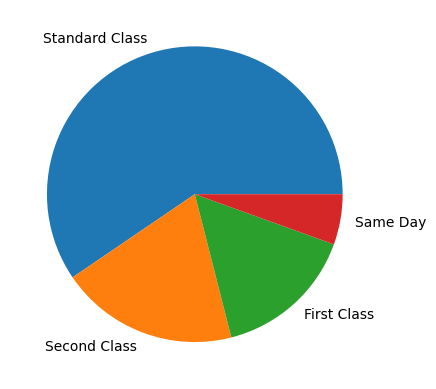

In [43]:
#     5.Can you visualize the distribution of shipping modes using a pie chart?

R = df['Ship Mode'].value_counts()
X=R.index
Y=R.values

plt.pie(Y ,labels=X)


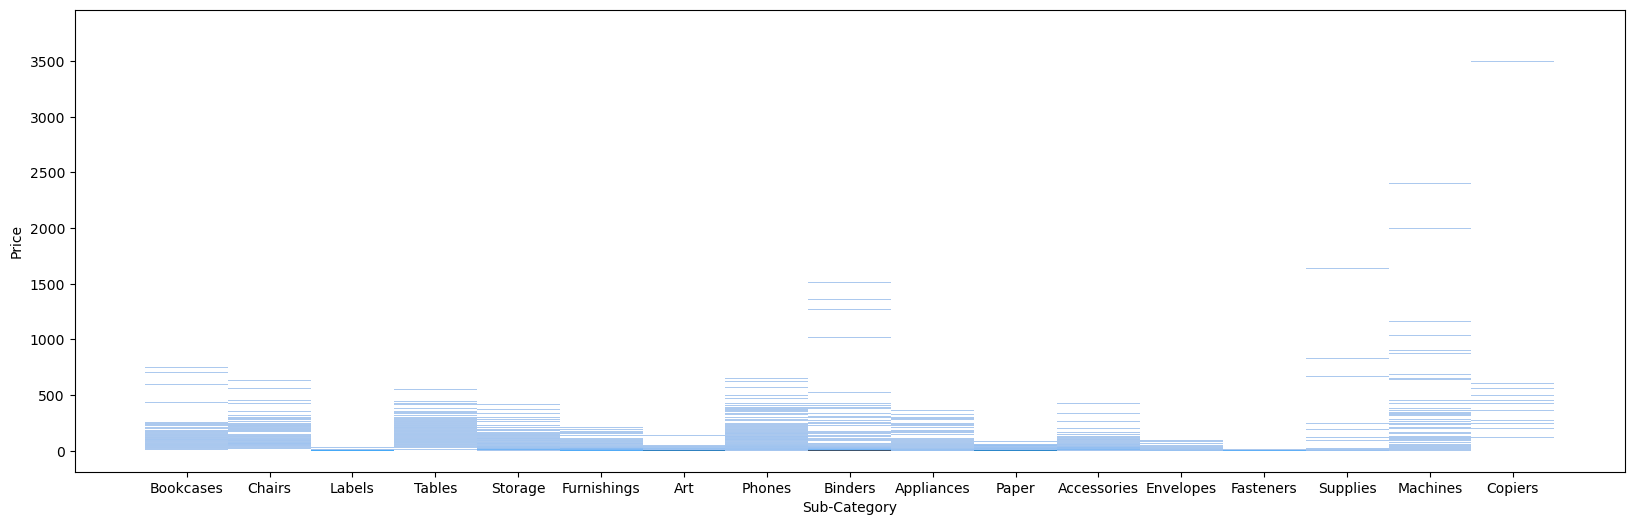

In [48]:
#   6.Plot a histogram to analyze the distribution of product prices.
import seaborn as sns

df['Price'] = df['Sales'] / df['Quantity']
category_price = df[['Sub-Category', 'Price']]

plt.figure(figsize=(20,6))
sns.histplot(data=category_price, x='Sub-Category', y='Price')
plt.show()

<Axes: xlabel='Region'>

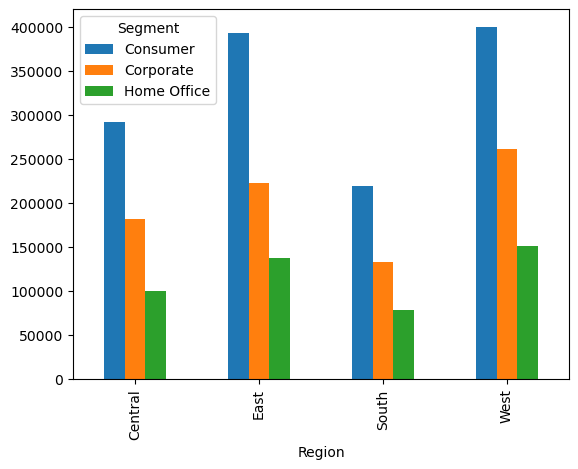

In [53]:
# 7.Create a stacked bar chart to compare the sales performance of different segments in each region.

df['Sales']=pd.to_numeric(df['Sales'],errors='coerce').fillna(0)
sales=df.groupby(["Region","Segment"])['Sales'].sum().unstack()
sales.plot(kind='bar')

#  Task 2

In [55]:
#   1. What is the total number of rows in the dataset?

total_rows = df.shape[0]
total_rows

11249

In [56]:
#     2. How many columns are there in the dataset?

total_columns=df.shape[1]
total_columns

39

In [69]:
# 3. What is the earliest order date in the dataset?


d=pd.to_datetime(df['Order Date']).min()
d

Timestamp('2014-01-03 00:00:00')

In [71]:
# 4. What is the latest ship date in the dataset?

d=pd.to_datetime(df['Ship Date']).max()
d

Timestamp('2018-01-05 00:00:00')

In [77]:
#  5. Which ship mode is the most commonly used?

t = df['Ship Mode'].value_counts().idxmax()
t

'Standard Class'

In [82]:
# 6. How many unique customers are there in the dataset?
x = df['Customer ID'].unique()
print('Unique costumers are: ',len(x))


Unique costumers are:  793


In [84]:
#   7. Which country has the highest number of orders?

state_order_counts = df.groupby("State")["Order ID"].count()
state_with_highest_orders = state_order_counts.idxmax()
print(state_with_highest_orders)


California


In [85]:
# 8. What is the average quantity of products ordered?
average = df["Quantity"].mean()
average


3.321361898835452

In [91]:
#    9. Which segment of customers generates the highest profit?
profit = df.groupby("Segment")["Profit"].sum()
profit.idxmax()

'Consumer'

In [93]:
#  10. Which sub-category of products has the highest average discount?


Average = df.groupby("Sub-Category")["Discount"].sum()
Average.idxmax()


'Binders'

<Axes: >

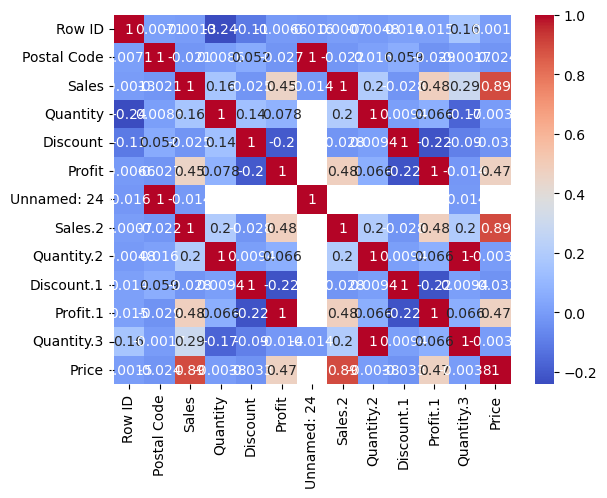

In [95]:
#  11. wrtie a code to remove outliers and then make a prefect Heatmap.

import seaborn as sb

n = df.select_dtypes(include = 'number')
n
correlation= n.corr()
correlation
sb.heatmap(correlation, annot=True ,cmap='coolwarm')
